In [2]:
# Cell 1: Import necessary libraries
# Import libraries essential for data manipulation, machine learning, model evaluation, and visualization

# numpy: A fundamental package for scientific computing with Python, often used for array manipulation.
# pandas: A data manipulation library to load and preprocess datasets, especially in tabular form.
# sklearn: A library for machine learning models, including data preprocessing, classification, evaluation, and hyperparameter tuning.
# matplotlib: A plotting library for data visualization to help display results, such as confusion matrices.
# seaborn: A data visualization library based on matplotlib, useful for aesthetic and statistical plots.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Cell 2: Load and display the dataset
# Load the dataset containing SMS messages labeled as 'ham' or 'spam'
# Dataset is a tab-separated text file, where each line contains a label and the associated message
# 'sep' parameter is set to '\t' to correctly parse the tab-separated format, and column names are assigned as 'label' and 'text'

df = pd.read_csv(r'e:\TY\ML\ML LAB\MLCODES\5th\SMSSpamCollection', sep='\t', names=['label', 'text'])

# Display the first few rows to verify the data structure and inspect the contents
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


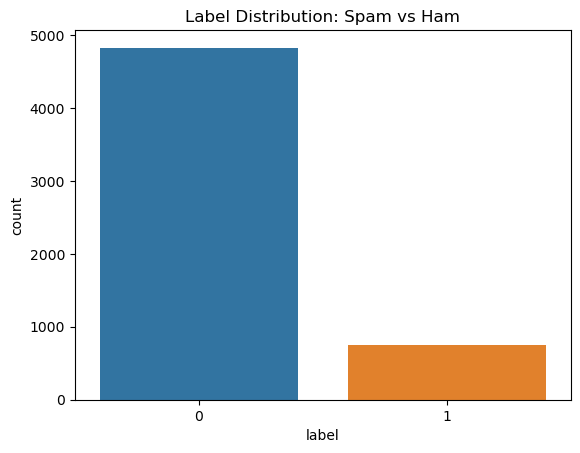

In [4]:
# Cell 3: Preprocess the data (label encoding)
# Transform categorical labels 'ham' and 'spam' into binary values using Label Encoding
# 'ham' is encoded as 0 (non-spam), while 'spam' is encoded as 1 (spam)
# This enables the machine learning models to work with numerical labels instead of text labels

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])  # Encoding: 'ham' -> 0, 'spam' -> 1

# Visualize label distribution to check class balance in the dataset using a count plot
sns.countplot(x=df['label'])
plt.title("Label Distribution: Spam vs Ham")  # Setting the title for the plot
plt.show()


In [5]:
# Cell 4: Prepare the data (train-test split)
# Separate features (text messages) and labels (spam or ham)
# Split the data into training and testing sets with a 70-30 ratio, using stratified sampling
# Stratified sampling ensures the distribution of 'spam' and 'ham' labels is balanced across both sets

X = df['text']  # Feature variable (SMS text)
y = df['label']  # Target variable (spam or ham)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# X_train, y_train: Training data used to train the models
# X_test, y_test: Testing data used to evaluate the models


In [6]:
# Cell 5: Extract features from the text data (text vectorization)
# Use CountVectorizer to convert text messages into a bag-of-words representation (word counts)
# This transforms text data into a numerical format suitable for machine learning models
# The 'stop_words' parameter is set to 'english' to remove common English words like 'the', 'is', etc.

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_vec = vectorizer.transform(X_test)  # Only transform the test data to ensure consistency


Naive Bayes Classifier Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.97      0.92      0.95       224

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

Naive Bayes Accuracy: 0.986244019138756


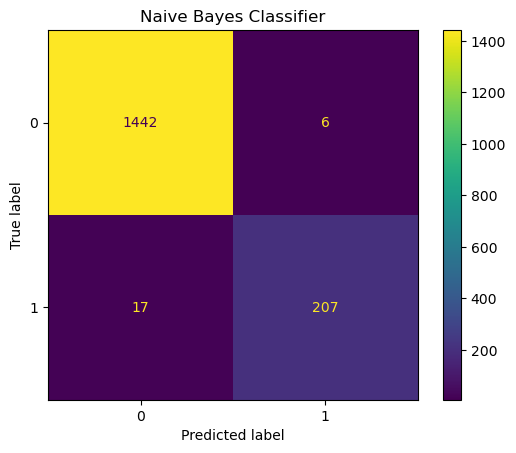

In [7]:
# Cell 6: Train and evaluate Naive Bayes classifier
# Train a Multinomial Naive Bayes model on the vectorized training data
# Naive Bayes is a probabilistic model commonly used in text classification tasks for its efficiency and effectiveness

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)  # Train the Naive Bayes classifier with the training data

# Make predictions on the test set and evaluate the performance
y_pred_nb = nb_classifier.predict(X_test_vec)
print("Naive Bayes Classifier Performance:")
print(classification_report(y_test, y_pred_nb))  # Display precision, recall, F1-score
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))  # Calculate and print the accuracy score

# Visualize the confusion matrix to further evaluate the performance of the model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.title('Naive Bayes Classifier')  # Set the title for clarity
plt.show()


SVM Classifier Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       1.00      0.83      0.91       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

SVM Accuracy: 0.9778708133971292


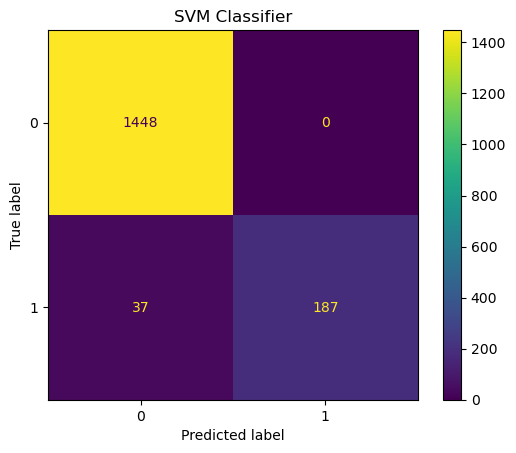

In [8]:
# Cell 7: Train and evaluate SVM classifier
# Train a Support Vector Machine (SVM) classifier with default parameters on the vectorized data
# SVM is chosen for comparison due to its effectiveness in handling high-dimensional data such as text

svm_classifier = SVC()
svm_classifier.fit(X_train_vec, y_train)  # Train the SVM classifier with the training data

# Make predictions on the test set and evaluate performance
y_pred_svm = svm_classifier.predict(X_test_vec)
print("SVM Classifier Performance:")
print(classification_report(y_test, y_pred_svm))  # Display precision, recall, F1-score
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))  # Calculate and print the accuracy score

# Visualize the confusion matrix for SVM
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title('SVM Classifier')
plt.show()


Naive Bayes Cross-Validation Accuracy: 0.9766666666666666
SVM Cross-Validation Accuracy: 0.9766666666666666


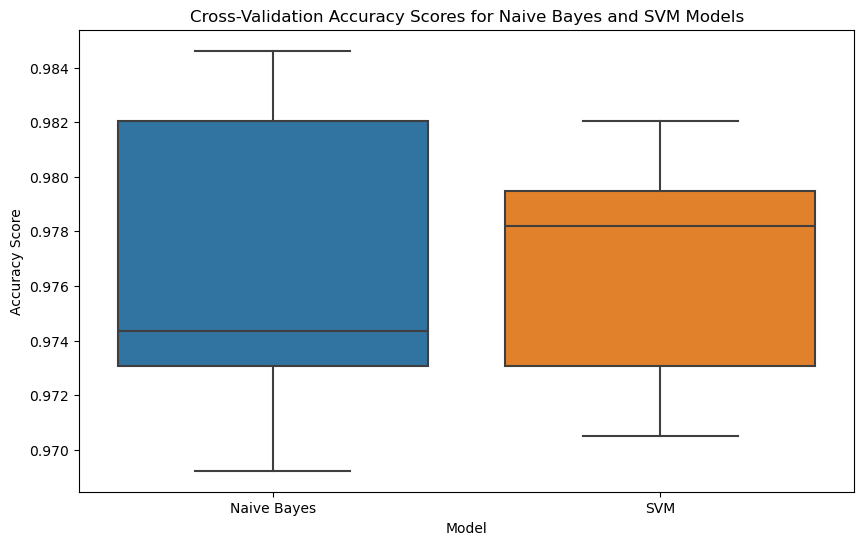

In [9]:
# Cell 8: Perform cross-validation with visualization
# Perform 5-fold cross-validation on both Naive Bayes and SVM models to evaluate model performance consistency
# Cross-validation splits the data into five folds and calculates accuracy for each fold, providing a more reliable measure

nb_cv_scores = cross_val_score(nb_classifier, X_train_vec, y_train, cv=5)  # Naive Bayes cross-validation scores
svm_cv_scores = cross_val_score(svm_classifier, X_train_vec, y_train, cv=5)  # SVM cross-validation scores

# Print average cross-validation accuracy across folds for both models
print("Naive Bayes Cross-Validation Accuracy:", nb_cv_scores.mean())
print("SVM Cross-Validation Accuracy:", svm_cv_scores.mean())

# Visualization: Box plot of cross-validation scores to show score distribution and variability
# Creating a DataFrame for easy plotting
cv_scores_df = pd.DataFrame({
    'Naive Bayes': nb_cv_scores,
    'SVM': svm_cv_scores
})

# Plotting the cross-validation results as a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_scores_df)
plt.title("Cross-Validation Accuracy Scores for Naive Bayes and SVM Models")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.show()


Best SVM Parameters: {'C': 10, 'kernel': 'linear'}
Best SVM Cross-Validation Accuracy: 0.9817948717948719
Optimized SVM Classifier Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       1.00      0.88      0.94       224

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Optimized SVM Accuracy: 0.9844497607655502


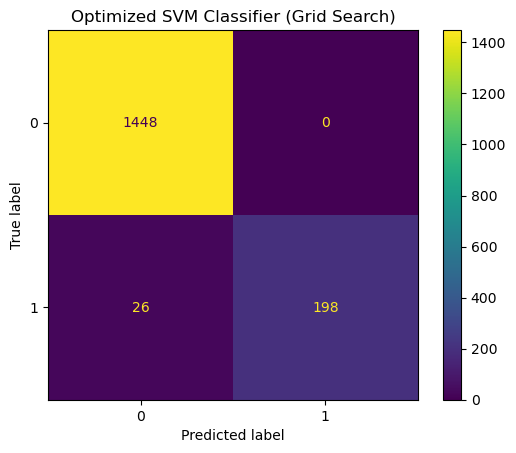

In [10]:
# Cell 9: Tune the hyperparameters of the SVM model using grid search
# Define a parameter grid to test different values of C (regularization parameter) and kernel types (linear and rbf)
# GridSearchCV performs exhaustive search over the parameter grid, evaluating each combination using cross-validation

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')  # Initialize GridSearchCV with SVM and parameters
grid_search.fit(X_train_vec, y_train)  # Fit the model to find the best parameter combination

# Print the best parameters and the corresponding cross-validation accuracy
print("Best SVM Parameters:", grid_search.best_params_)
print("Best SVM Cross-Validation Accuracy:", grid_search.best_score_)

# Make predictions on the test set with the optimized SVM model and evaluate
y_pred_grid = grid_search.predict(X_test_vec)
print("Optimized SVM Classifier Performance:")
print(classification_report(y_test, y_pred_grid))  # Performance metrics of optimized model
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_grid))  # Accuracy of optimized model

# Visualize the confusion matrix of the optimized SVM model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_grid)
plt.title('Optimized SVM Classifier (Grid Search)')
plt.show()
